### EDA Bike Rentals 

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Data

hour = pd.read_csv('hour.csv')
day = pd.read_csv('day.csv')

### Lets get to know our Data

Beginning this project we are going to focus on the hour data. This dataset contains total bike rentals per hour. Let's see the first 5 rowns.

In [3]:
hour.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


Next step is to output some basic info. We can see that there are 17379 (per hour)instances and thankfully we have no missing data.

In [4]:
print(hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Using describe method we can notice some useful data about the minimum or maximum bike data rentals. We can see that at some point there was only 1 bike rental while the mean rental is supposed to be at 189 bikes per hour. That makes me wonder what was happening at that time. Maybe some really bad weather conditions or something. We are going to further dig into the data later on.

In [5]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
# Convert temperature to celsius format

hour['temp'] = hour['temp'].apply(lambda x: x*41)
hour['atemp'] = round(hour['atemp'].apply(lambda x: x*50),2)

hour.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,403.44,720.0,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,369.82,682.0,0.80,0.0,8,32,40


### Some Statistics

Find out the maximum rental number per hour and when did that occured.

In [8]:
print('The max rental per hour was:', hour['cnt'].max(), 'and it happened:')
print ('-' * 50)
#hour[hour['cnt']==hour['cnt'].max()]
print(hour.loc[hour['cnt'].idxmax()])

The max rental per hour was: 977 and it happened:
--------------------------------------------------
instant            14774
dteday        2012-09-12
season                 3
yr                     1
mnth                   9
hr                    18
holiday                0
weekday                3
workingday             1
weathersit             1
temp             1109.46
atemp               1553
hum                 0.44
windspeed         0.2537
casual                91
registered           886
cnt                  977
Name: 14773, dtype: object


#### Counting the total bike rentals during that period we see that there were 3,292,679 rentals. That is impressive.

In [9]:
print('Total count of bike rentals are :', hour['cnt'].sum())

Total count of bike rentals are : 3292679


In [10]:
# Let's see the registered user percentage renting.

print('Total count of registered user rentals were :', hour['registered'].sum())
print('Bikes rented by registered users were:',round(hour['registered'].sum()/hour['cnt'].sum()*100,2),'%')

Total count of registered user rentals were : 2672662
Bikes rented by registered users were: 81.17 %


In [11]:
# Same way about non registered users percentage.

print('Total count of non registered user rentals were :', hour['casual'].sum())
print('Bikes rented by non registered users were:',round(hour['casual'].sum()/hour['cnt'].sum()*100,2),'%')

Total count of non registered user rentals were : 620017
Bikes rented by non registered users were: 18.83 %


In [12]:
# Let's see the mean value of bike rental per hour

print('Mean value of bike rentals per hour is:', hour['cnt'].mean())

Mean value of bike rentals per hour is: 189.46308763450142


### Great. 
Knowing the bike rentals per hour we can count bike rentals per minute.So, every minute at least 3 people were renting a bicycle to roam!! Huge number!

In [13]:
print('Bike rentals per minute: ', hour['cnt'].mean()/60)

Bike rentals per minute:  3.1577181272416905


### Some more Digging

Let's get an idea about the weather during the instances. Most of the time that data were recorded, weather was clear with few clouds. Only at 3 instances weather was really bad.

In [14]:
weather_dict = {1: 'Clear - Few Clouds', 2: 'Mist - Cloudy', 3: 'Light Rain - Snow', 4: 'Heavy Rain - Thunderstorm'}
hour.groupby(['weathersit']).size().rename(index=weather_dict).rename_axis("Weather Conditions")

Weather Conditions
Clear - Few Clouds           11413
Mist - Cloudy                 4544
Light Rain - Snow             1419
Heavy Rain - Thunderstorm        3
dtype: int64

Bike rental per hour and percentage of the the total number. Five in the afternoon is the cler winner here.

In [15]:
c = hour[["hr", "cnt"]].groupby(['hr']).sum().sort_values(by='cnt',ascending=False)
c['Percentage']= round(c['cnt']/c['cnt'].sum(),2)

print(c)

       cnt  Percentage
hr                    
17  336860        0.10
18  309772        0.09
8   261001        0.08
16  227748        0.07
19  226789        0.07
13  184919        0.06
12  184414        0.06
15  183149        0.06
14  175652        0.05
20  164550        0.05
9   159438        0.05
7   154171        0.05
11  151320        0.05
10  126257        0.04
21  125445        0.04
22   95612        0.03
23   63941        0.02
6    55132        0.02
0    39130        0.01
1    24164        0.01
2    16352        0.00
5    14261        0.00
3     8174        0.00
4     4428        0.00


Every afternoon during 17:00-18:00 there were average 461 bike rentals!! The least bike rentals where are 4 in the morning.

In [16]:
d = round(hour[["hr", "cnt"]].groupby(['hr']).mean().sort_values(by='cnt',ascending=False),2)
print(d)

       cnt
hr        
17  461.45
18  425.51
8   359.01
16  311.98
19  311.52
13  253.66
12  253.32
15  251.23
14  240.95
20  226.03
9   219.31
7   212.06
11  208.14
10  173.67
21  172.31
22  131.34
23   87.83
6    76.04
0    53.90
1    33.38
2    22.87
5    19.89
3    11.73
4     6.35


In [17]:
# Let's group by Season. Autumn is the most favorable season for the bikers.

season_dict = {1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'}
hour[["season", "cnt"]].groupby(['season']).sum().rename(index=season_dict).rename_axis("Season")

,cnt
Season,
Spring,471348
Summer,918589
Autumn,1061129
Winter,841613


In [18]:
# Grouping by Year

year_dict = {0: '2011', 1: '2012'}
hour[["yr", "cnt"]].groupby(['yr']).sum().rename(index=year_dict).rename_axis("Year")

,cnt
Year,
2011,1243103
2012,2049576


In [19]:
print('Biking rental was up by',round((100 * (2049576 - 1243103) / 1243103),2),'% from 2011 to 2012')

Biking rental was up by 64.88 % from 2011 to 2012


In [20]:
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
hour[["mnth", "cnt"]].groupby(['mnth']).sum().rename(index=month_dict).rename_axis("Month")

,cnt
Month,
January,134933
February,151352
March,228920
April,269094
May,331686
June,346342
July,344948
August,351194
September,345991


Saturday is the day that most people rented a bicycle.

In [23]:
day_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday',6: 'Sunday'}
hour[["weekday", "cnt"]].groupby(['weekday']).sum().rename(index=day_dict).rename_axis("Weekday")

,cnt
Weekday,
Monday,444027
Tuesday,455503
Wednesday,469109
Thursday,473048
Friday,485395
Saturday,487790
Sunday,477807


### Exploratory Data Analysis

We see clearly here that Summer and Fall are the most preferred seasons for bike rentals.

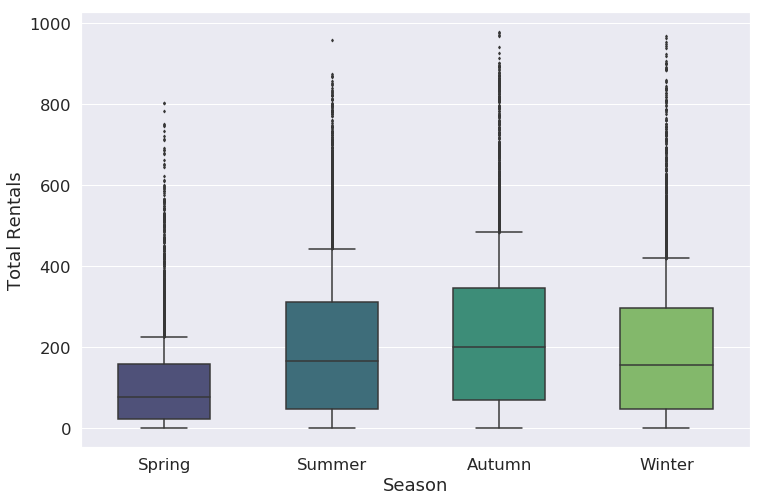

In [24]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="season", y="cnt", data=hour, width=.55, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Autumn', 'Winter'])
ax.set_xlabel("Season")
ax.set_ylabel("Total Rentals")
plt.show()

Similarly we get an idea about rentals per day.

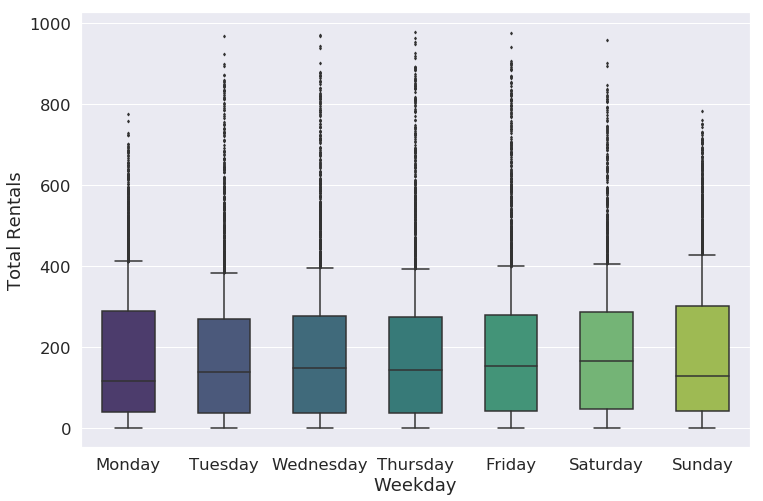

In [25]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="weekday", y="cnt", data=hour, width=.55, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
ax.set_xlabel("Weekday")
ax.set_ylabel("Total Rentals")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

We can see the clear difference between 2011 and 2012. 

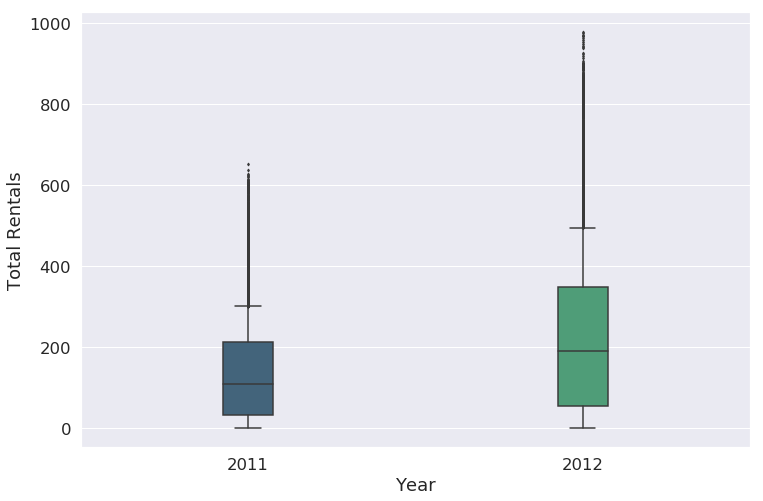

In [26]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="yr", y="cnt", data=hour, width=.15, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
plt.xticks([0, 1], ['2011', '2012'])
ax.set_xlabel("Year")
ax.set_ylabel("Total Rentals")
plt.show()

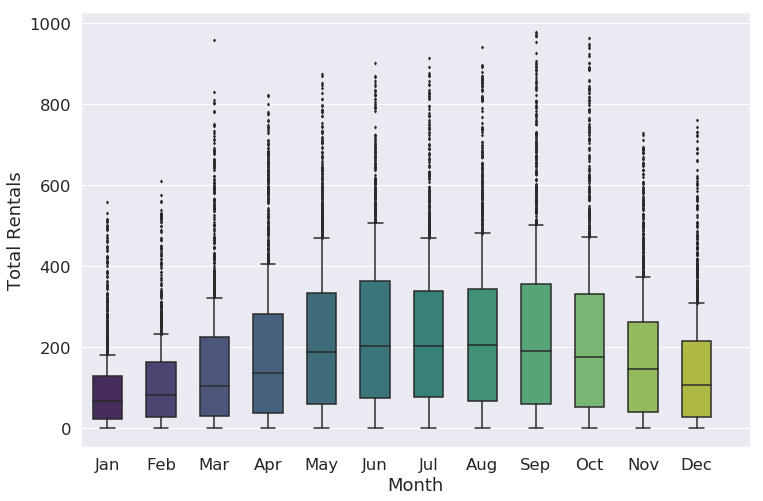

In [27]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="mnth", y="cnt", data=hour, width=.55, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
ax.set_xlabel("Month")
ax.set_ylabel("Total Rentals")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct','Nov', 'Dec'])
plt.show()

Most of the bikes are rented at 8 in the morning and 5-6 on the evening. Probably because of the working hours. Some people seem to prefer bike for going & leaving their jobs xD.

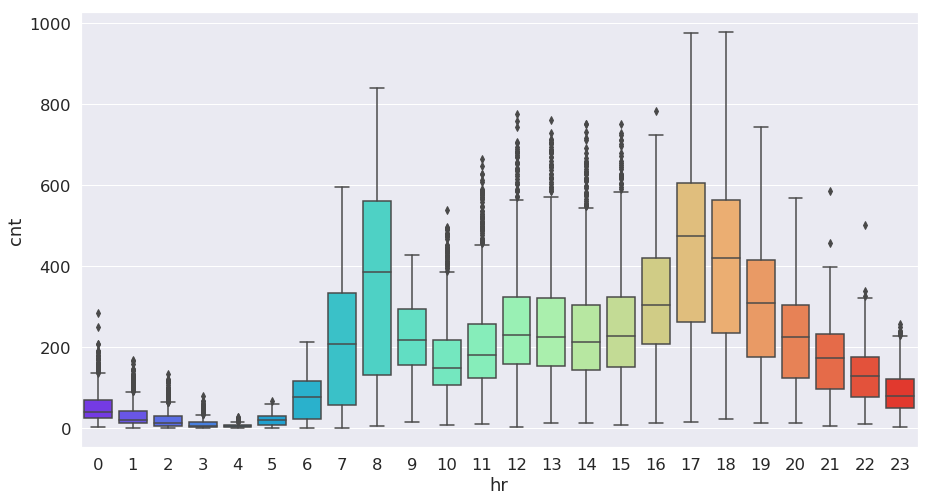

In [28]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(15,8))
sns.boxplot(x="hr", y="cnt", data=hour,palette='rainbow')
plt.show()

In [29]:
melted = pd.melt(hour, value_vars=['casual','registered'])
#melted.head(4)
melted.tail(4)

,variable,value
34754,registered,81
34755,registered,83
34756,registered,48
34757,registered,37


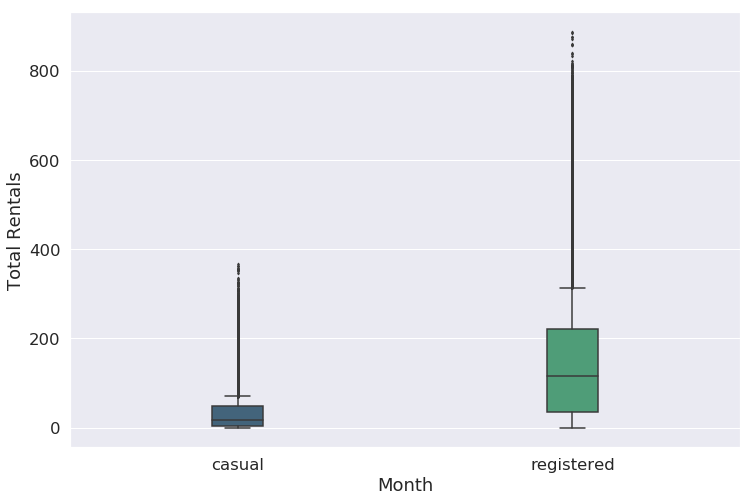

In [30]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="variable", y="value", data=melted, width=.15, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
ax.set_xlabel("Month")
ax.set_ylabel("Total Rentals")
#plt.xticks([0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct','Nov', 'Dec'])
plt.show()

Using a distplot we see that most of bike rental instances per hour are between 0 and 200.

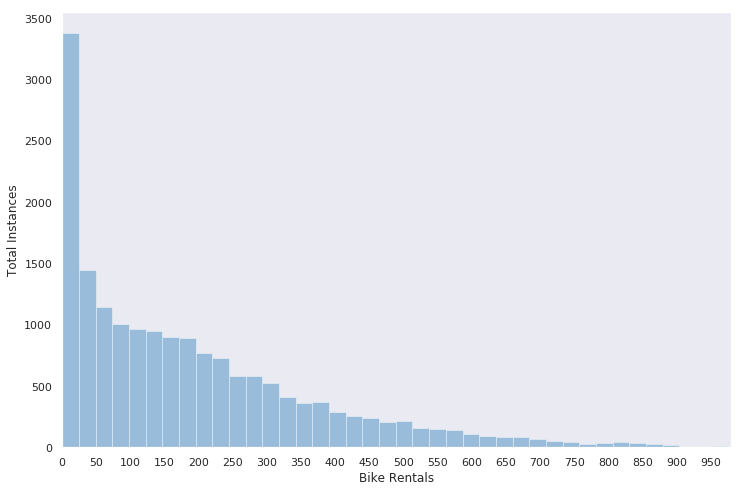

In [69]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("dark")
plt.figure(figsize=(12,8))
#paper, notebook, talk, poster
sns.set_context('notebook')
plt.xlim(0, 980)
plt.xticks(np.arange(0, 980, 50))
x = hour['cnt']
ax = sns.distplot(x, kde=False, bins=40)
ax.set_xlabel("Bike Rentals")
ax.set_ylabel("Total Instances")
plt.show()

#### Bike rentals according to temperature.

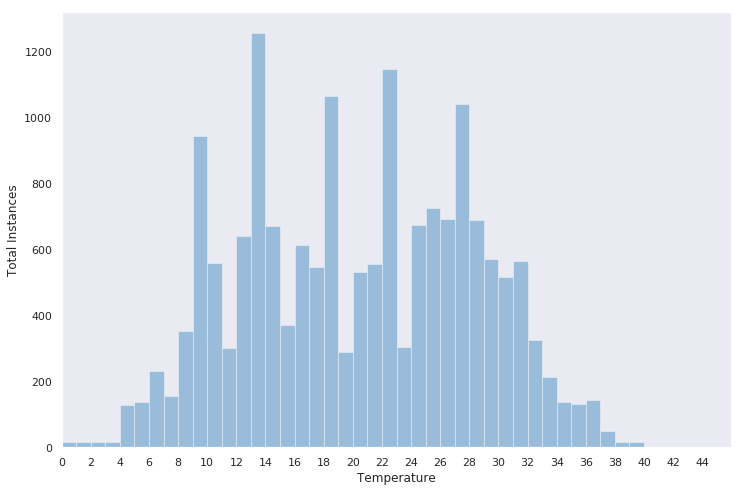

In [89]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("dark")
plt.figure(figsize=(12,8))
#paper, notebook, talk, poster
sns.set_context('notebook')
plt.xlim(0, 46)
plt.xticks(np.arange(0, 46, 2))
bins = np.arange(0, 50, 1)
x = hour['temp']
ax = sns.distplot(x, kde=False, bins=bins)
ax.set_xlabel("Temperature")
ax.set_ylabel("Total Instances")
plt.show()

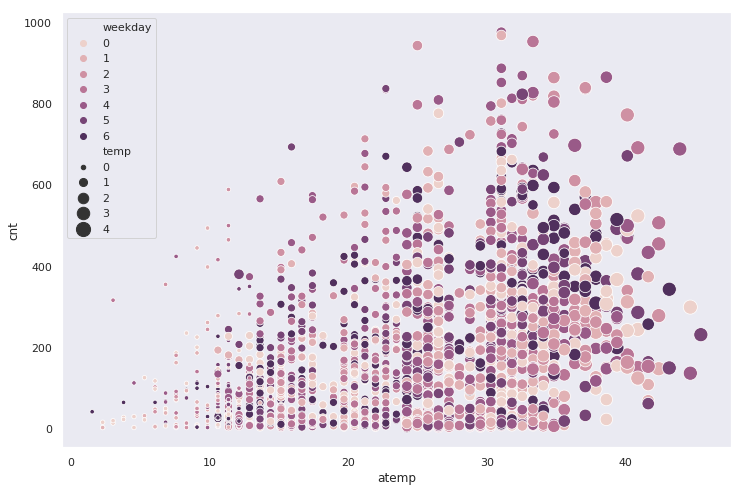

In [168]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("dark")
plt.figure(figsize=(12,8))
#paper, notebook, talk, poster
sns.set_context('notebook')
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="atemp", y="cnt",hue="weekday", size="temp",sizes=(20, 200), hue_norm=(0, 7),
                         legend="full", data=hs)

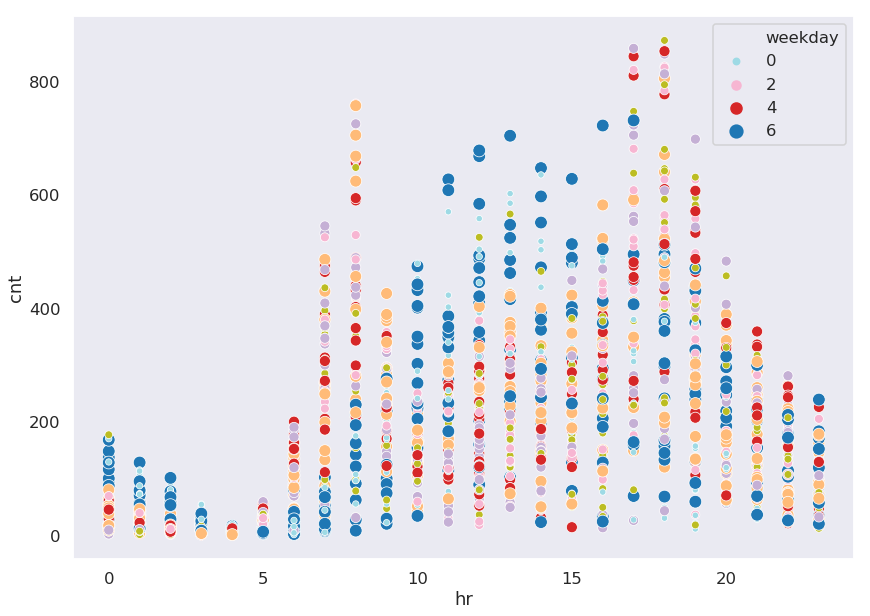

In [152]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("dark")
plt.figure(figsize=(14,10))
#paper, notebook, talk, poster
sns.set_context('talk')
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="hr", y="cnt", hue="weekday", size="weekday",palette="tab20_r",data=hs)